#IMPORTING DATA AND INITIAL STEPS

In [510]:
import pandas as pd
#loading the data to python
data = pd.read_csv("/content/train_loan.csv")

In [511]:
data #Printing the data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [512]:
data.duplicated().sum() #no duplicates exists

np.int64(0)

In [513]:
data.info() #checking information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [514]:
data.isnull().mean()*100 #checking for blank cells in data

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [515]:
data.describe() #shows major difference in mean and median values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

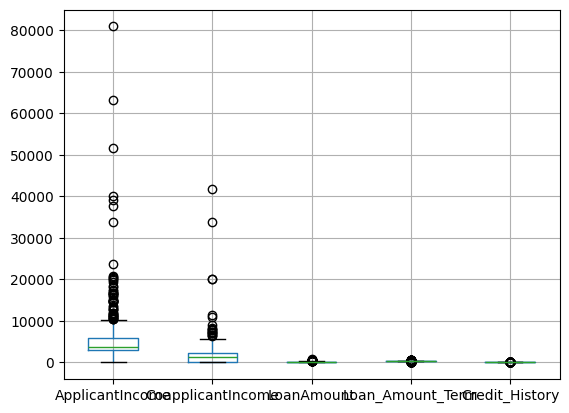

In [516]:
data.boxplot() #to check for outliers

In [517]:
data.isnull().mean()*100 #checking missing values.. all in 1-10% range so handling with median and mode

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


#HANDLING MISSING VALUES

In [518]:
import statistics as st #to find median and mode
data["Gender"].fillna(st.mode(data["Gender"]),inplace=True)

/tmp/ipython-input-1853743657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].fillna(st.mode(data["Gender"]),inplace=True)


In [519]:
data["Dependents"].fillna(st.mode(data["Dependents"]),inplace=True)

/tmp/ipython-input-3730673911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Dependents"].fillna(st.mode(data["Dependents"]),inplace=True)


In [520]:
data["Married"].fillna(st.mode(data["Married"]),inplace=True)
data["Self_Employed"].fillna(st.mode(data["Self_Employed"]),inplace=True)

/tmp/ipython-input-477032629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Married"].fillna(st.mode(data["Married"]),inplace=True)
/tmp/ipython-input-477032629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [521]:
data["LoanAmount"].fillna(st.median(data["LoanAmount"]),inplace=True)

/tmp/ipython-input-4027991967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LoanAmount"].fillna(st.median(data["LoanAmount"]),inplace=True)


In [522]:
data["Loan_Amount_Term"].fillna(st.median(data["Loan_Amount_Term"]),inplace=True)

/tmp/ipython-input-2017341679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Loan_Amount_Term"].fillna(st.median(data["Loan_Amount_Term"]),inplace=True)


In [523]:
data["Credit_History"].fillna(st.median(data["Credit_History"]),inplace=True)

/tmp/ipython-input-4149637654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Credit_History"].fillna(st.median(data["Credit_History"]),inplace=True)


In [524]:
data.isnull().mean()*100 # to check if all missing values are handled

,0
Loan_ID,0.000000
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,0.000000


In [525]:
data["LoanAmount"].median() #using pandas as using statistics median getting as NaN

128.0

In [526]:
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

/tmp/ipython-input-890643502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)


In [527]:
data.isnull().mean()*100 #all data missing values handled

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


#OUTLIER DETECTION
Capping and scaling

<Axes: >

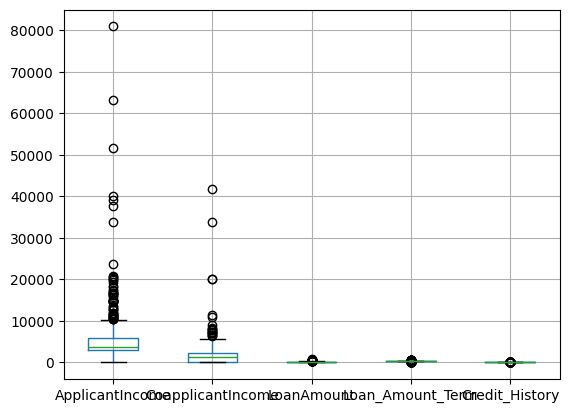

In [528]:
data.boxplot()

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

In [530]:
num_cols = data.select_dtypes("number")
cat_cols = data.select_dtypes("object")

In [531]:
num_cols



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [532]:
num_cols.skew() #major skew exists
#mean>median --> pos skew

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.402112
Credit_History,-2.021971


In [533]:
cat_cols

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


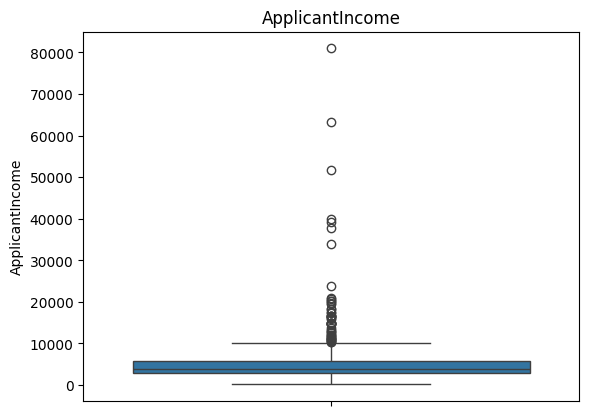

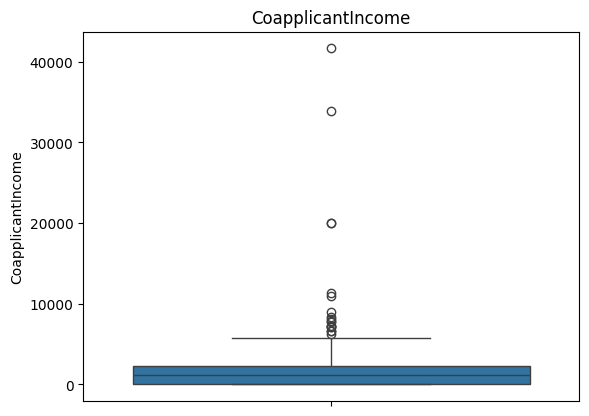

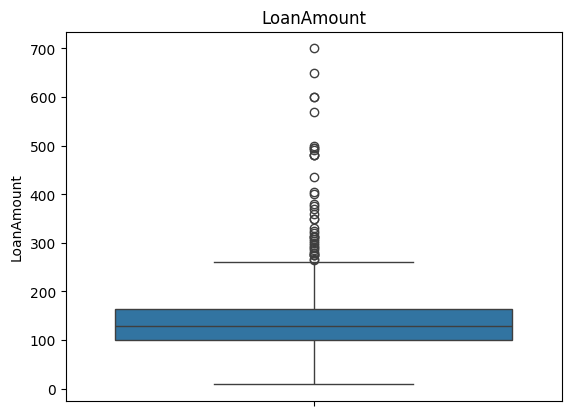

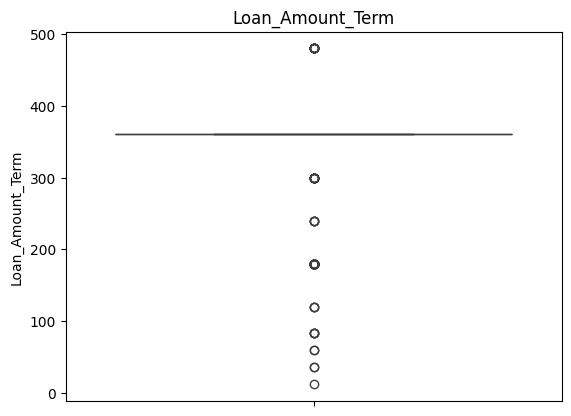

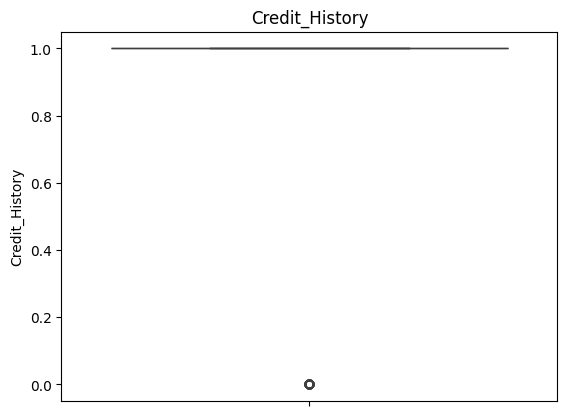

In [534]:
#plotting boxplot
for i in num_cols.columns:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

In [535]:
import numpy as np
for i in num_cols.columns: #finding lower and upper limits of each
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR = Q3-Q1 #InterQuartile Range
  lower = Q1 - 2.5*IQR
  upper = Q3 + 2.5*IQR
  data[i] = np.clip(data[i],lower,upper)
  print("For",i , " Q1","= ",Q1," Q3","= ",Q3," IQR","= ", IQR,"lower ","= ",lower,"upper","= ",upper)

For ApplicantIncome  Q1 =  2877.5  Q3 =  5795.0  IQR =  2917.5 lower  =  -4416.25 upper =  13088.75
For CoapplicantIncome  Q1 =  0.0  Q3 =  2297.25  IQR =  2297.25 lower  =  -5743.125 upper =  8040.375
For LoanAmount  Q1 =  100.25  Q3 =  164.75  IQR =  64.5 lower  =  -61.0 upper =  326.0
For Loan_Amount_Term  Q1 =  360.0  Q3 =  360.0  IQR =  0.0 lower  =  360.0 upper =  360.0
For Credit_History  Q1 =  1.0  Q3 =  1.0  IQR =  0.0 lower  =  1.0 upper =  1.0


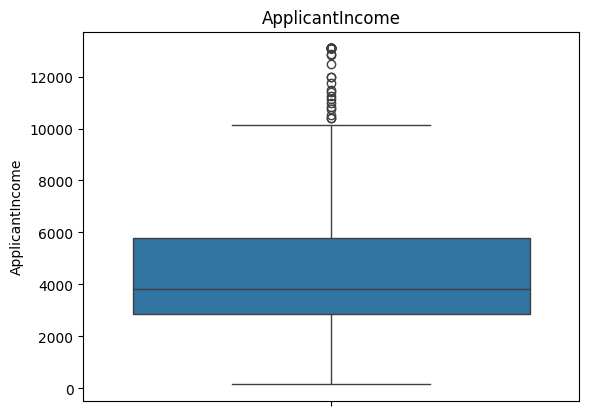

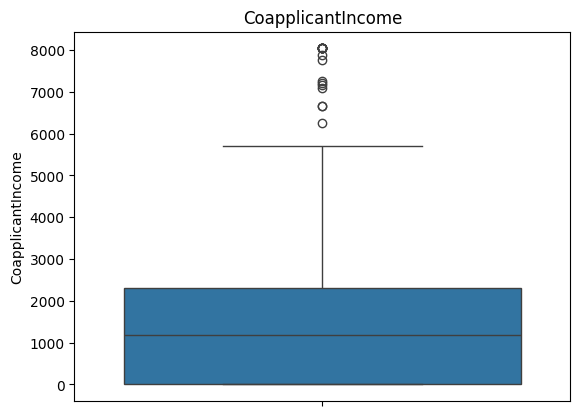

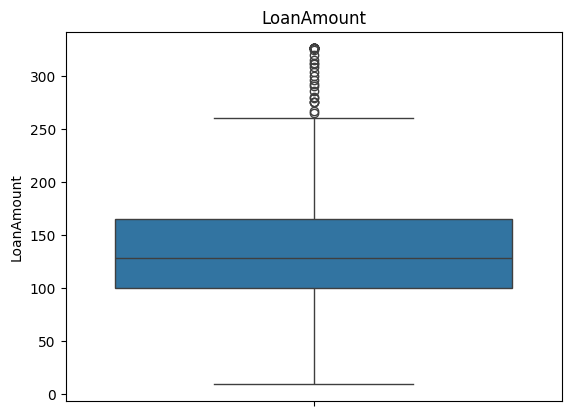

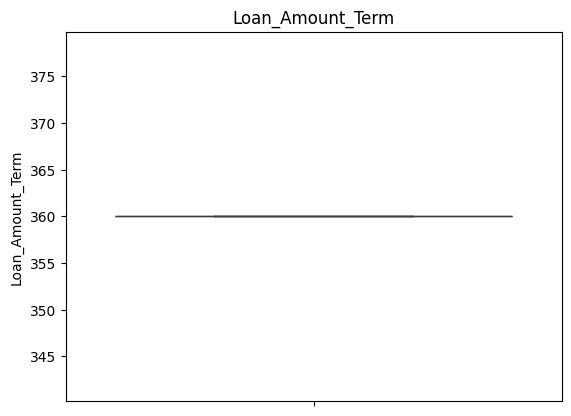

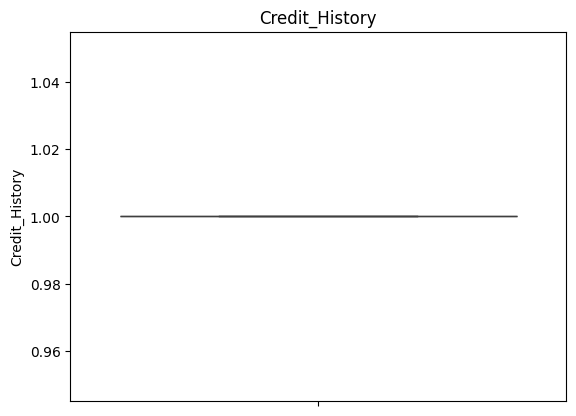

In [536]:
#plotting boxplot
for i in num_cols.columns:
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

  #insight --> outliers are removed

In [537]:
num_cols.skew()

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.402112
Credit_History,-2.021971


ApplicantIncome	6.539513 --> log/reciprocal/boxcox

CoapplicantIncome	7.491531 --> log/reciprocal/boxcox

LoanAmount	2.743053 --> log/reciprocal/boxcox

Loan_Amount_Term	-2.402112 --> exp/cube power

Credit_History	-2.021971 --> exp/square

In [538]:
#scaling to reduce skewness
import numpy as np
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])

In [539]:
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

In [540]:
data['LoanAmount_rec'] = 1/ (data["LoanAmount"] + 1e-9)

In [541]:
data['LoanAmount_rec'].skew()

np.float64(7.915572784916949)

In [542]:
data['LoanAmount_log'] = np.log1p(data['LoanAmount'])

In [543]:
data['LoanAmount_log'].skew()#better is log

np.float64(-0.6153610927064797)

In [544]:
data['LoanAmount'] = np.log1p(data['LoanAmount'])

In [545]:
data['Loan_Amount_Term'] = np.exp(data['Loan_Amount_Term'])

In [546]:
data['Credit_History'] = np.exp(data['Credit_History'])

In [547]:
data.select_dtypes("number").skew()

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


,0
ApplicantIncome,-0.295400
CoapplicantIncome,-0.181219
LoanAmount,-0.615361
Loan_Amount_Term,NaN
Credit_History,0.000000
LoanAmount_rec,7.915573
LoanAmount_log,-0.615361


In [548]:
updated_numcol = data.select_dtypes("number")

In [549]:
data.describe() #checking the mean and median

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_rec,LoanAmount_log
count,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,8.315604,4.280829,4.853985,2.218265e+156,2.718282e+00,0.008931,4.853985
std,0.576786,3.863140,0.461118,1.296704e+142,1.377799e-14,0.006541,0.461118
min,5.017280,0.000000,2.302585,2.218265e+156,2.718282e+00,0.003067,2.302585
25%,7.965024,0.000000,4.617584,2.218265e+156,2.718282e+00,0.006070,4.617584
50%,8.246303,7.081125,4.859812,2.218265e+156,2.718282e+00,0.007812,4.859812
75%,8.664922,7.739897,5.110477,2.218265e+156,2.718282e+00,0.009975,5.110477
max,9.479585,8.992355,5.789960,2.218265e+156,2.718282e+00,0.111111,5.789960


In [550]:
updated_numcol.skew() #checking the skew

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


,0
ApplicantIncome,-0.295400
CoapplicantIncome,-0.181219
LoanAmount,-0.615361
Loan_Amount_Term,NaN
Credit_History,0.000000
LoanAmount_rec,7.915573
LoanAmount_log,-0.615361


<Axes: >

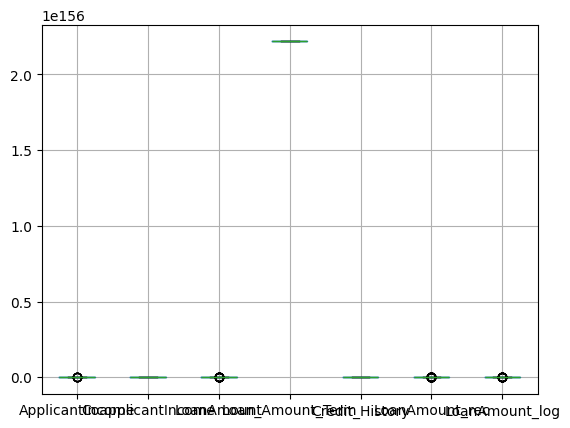

In [551]:
data.select_dtypes("number").boxplot() #some error exists

In [552]:
# Create a temporary dataframe from the original CSV to ensure clean starting points for problematic columns
temp_data = pd.read_csv("/content/train_loan.csv")

# Re-apply missing value imputation for all relevant columns to temp_data
temp_data["Gender"].fillna(st.mode(temp_data["Gender"]), inplace=True)
temp_data["Dependents"].fillna(st.mode(temp_data["Dependents"]), inplace=True)
temp_data["Married"].fillna(st.mode(temp_data["Married"]), inplace=True)
temp_data["Self_Employed"].fillna(st.mode(temp_data["Self_Employed"]), inplace=True)
temp_data["LoanAmount"].fillna(temp_data["LoanAmount"].median(), inplace=True)
temp_data["Loan_Amount_Term"].fillna(st.median(temp_data["Loan_Amount_Term"]), inplace=True)
temp_data["Credit_History"].fillna(st.median(temp_data["Credit_History"]), inplace=True)

# Restoring 'Loan_Amount_Term' and 'Credit_History' in the main 'data' DataFrame
data['Loan_Amount_Term'] = temp_data['Loan_Amount_Term']
data['Credit_History'] = temp_data['Credit_History']

# Re-applying log transformations
data['ApplicantIncome'] = np.log1p(temp_data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(temp_data['CoapplicantIncome'])
data['LoanAmount'] = np.log1p(temp_data['LoanAmount'])



/tmp/ipython-input-2369773049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_data["Gender"].fillna(st.mode(temp_data["Gender"]), inplace=True)
/tmp/ipython-input-2369773049.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

Skewness after correcting problematic transformations:


,0
ApplicantIncome,0.482128
CoapplicantIncome,-0.173073
LoanAmount,-0.151578
Loan_Amount_Term,-2.402112
Credit_History,-2.021971



Boxplots after correcting transformations:


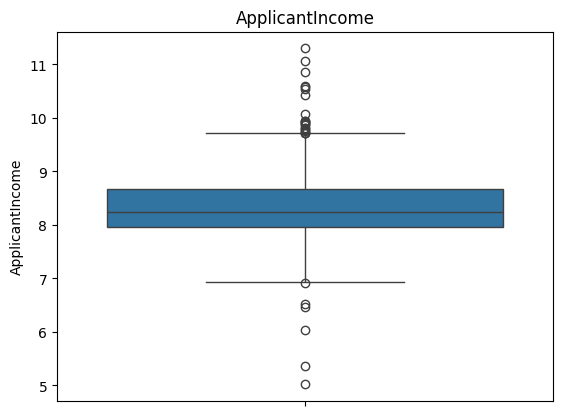

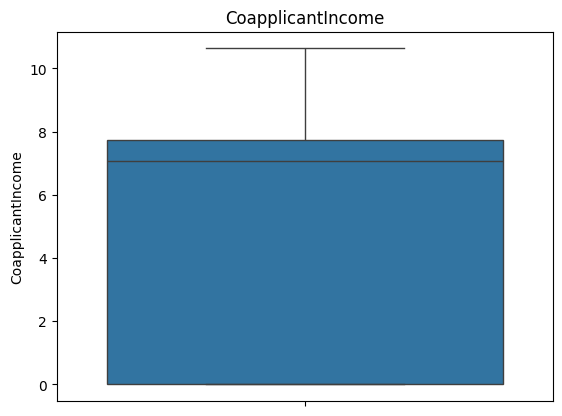

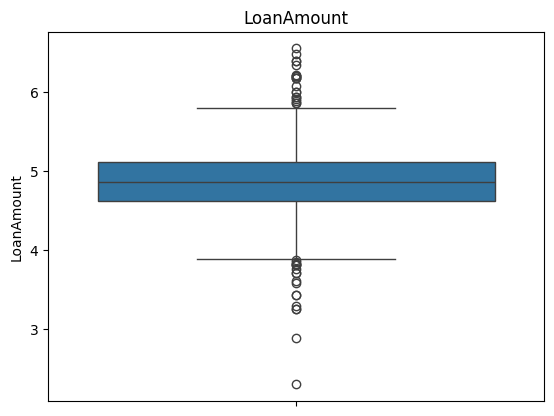

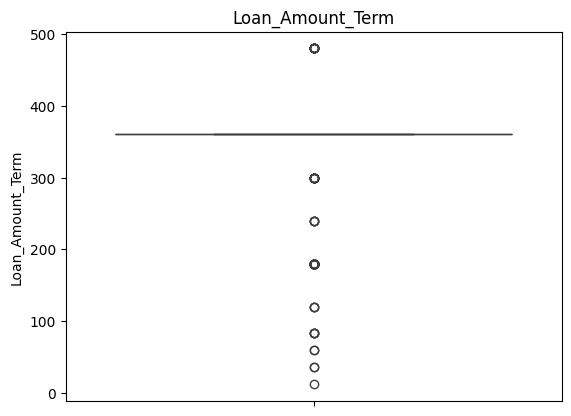

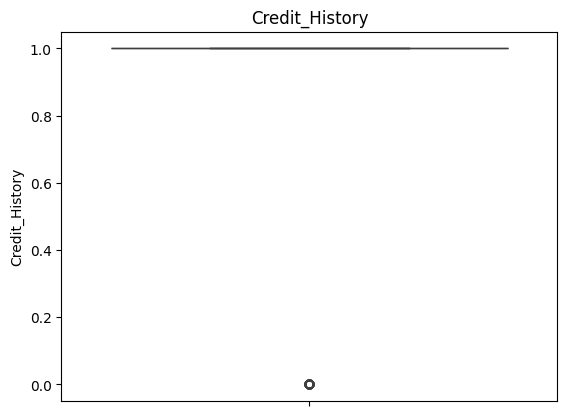

In [553]:
# Drop temporary columns created during initial skewness experimentation
if 'LoanAmount_rec' in data.columns:
    data = data.drop(columns=['LoanAmount_rec'])
if 'LoanAmount_log' in data.columns:
    data = data.drop(columns=['LoanAmount_log'])

# Re-evaluating numerical columns and their skewness after corrections
updated_numcol = data.select_dtypes("number")
print("Skewness after correcting problematic transformations:")
display(updated_numcol.skew())

# Re-plotting boxplots for all numerical columns
print("\nBoxplots after correcting transformations:")
for col in updated_numcol.columns:
  plt.figure() # Create a new figure for each boxplot for better readability
  sns.boxplot(data[col])
  plt.title(col)
  plt.show()

#ENCODING

In [554]:
cat_cols.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [555]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [556]:
cat_cols

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [557]:
#Nominal encoding for no order data
le= LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

In [558]:
data["Married"] = le.fit_transform(data["Married"])

In [559]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,8.674197,0.000000,4.859812,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,7.972811,0.000000,4.276666,360.0,1.0,Rural,Y
610,LP002979,1,1,3+,Graduate,No,8.320448,0.000000,3.713572,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8.996280,5.484797,5.537334,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,8.933796,0.000000,5.236442,360.0,1.0,Urban,Y


In [560]:
#Ordinal encoding for ordered data
oe = OrdinalEncoder(categories=[['0','1','2','3+']])

In [561]:
data["Dependents"]=oe.fit_transform(data[["Dependents"]])

In [562]:
data["Dependents"]

,Dependents
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
609,0.0
610,3.0
611,1.0
612,2.0


In [563]:
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])

In [564]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,0,8.674197,0.000000,4.859812,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,Graduate,0,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,Graduate,1,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,Not Graduate,0,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,Graduate,0,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,Graduate,0,7.972811,0.000000,4.276666,360.0,1.0,Rural,Y
610,LP002979,1,1,3.0,Graduate,0,8.320448,0.000000,3.713572,180.0,1.0,Rural,Y
611,LP002983,1,1,1.0,Graduate,0,8.996280,5.484797,5.537334,360.0,1.0,Urban,Y
612,LP002984,1,1,2.0,Graduate,0,8.933796,0.000000,5.236442,360.0,1.0,Urban,Y


In [565]:
#Onehot encoding #dtype to get as int & drop first to drop the nth column(reduce columns)
data = pd.get_dummies(data,columns=['Property_Area','Education'],dtype=int,drop_first="True")

In [566]:
data #all changed to numbers

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,LP001002,1,0,0.0,0,8.674197,0.000000,4.859812,360.0,1.0,Y,0,1,0
1,LP001003,1,1,1.0,0,8.430327,7.319202,4.859812,360.0,1.0,N,0,0,0
2,LP001005,1,1,0.0,1,8.006701,0.000000,4.204693,360.0,1.0,Y,0,1,0
3,LP001006,1,1,0.0,0,7.857094,7.765993,4.795791,360.0,1.0,Y,0,1,1
4,LP001008,1,0,0.0,0,8.699681,0.000000,4.955827,360.0,1.0,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,7.972811,0.000000,4.276666,360.0,1.0,Y,0,0,0
610,LP002979,1,1,3.0,0,8.320448,0.000000,3.713572,180.0,1.0,Y,0,0,0
611,LP002983,1,1,1.0,0,8.996280,5.484797,5.537334,360.0,1.0,Y,0,1,0
612,LP002984,1,1,2.0,0,8.933796,0.000000,5.236442,360.0,1.0,Y,0,1,0


<Axes: >

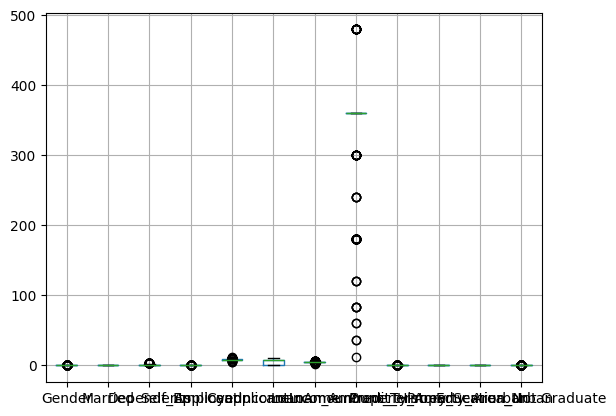

In [567]:
data.boxplot()

In [568]:
data

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,LP001002,1,0,0.0,0,8.674197,0.000000,4.859812,360.0,1.0,Y,0,1,0
1,LP001003,1,1,1.0,0,8.430327,7.319202,4.859812,360.0,1.0,N,0,0,0
2,LP001005,1,1,0.0,1,8.006701,0.000000,4.204693,360.0,1.0,Y,0,1,0
3,LP001006,1,1,0.0,0,7.857094,7.765993,4.795791,360.0,1.0,Y,0,1,1
4,LP001008,1,0,0.0,0,8.699681,0.000000,4.955827,360.0,1.0,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,7.972811,0.000000,4.276666,360.0,1.0,Y,0,0,0
610,LP002979,1,1,3.0,0,8.320448,0.000000,3.713572,180.0,1.0,Y,0,0,0
611,LP002983,1,1,1.0,0,8.996280,5.484797,5.537334,360.0,1.0,Y,0,1,0
612,LP002984,1,1,2.0,0,8.933796,0.000000,5.236442,360.0,1.0,Y,0,1,0


#SCALING

In [569]:
#Encoded items are not scaled
data.describe() #checking mean and median

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.133550,8.341510,4.290129,4.866091,342.410423,0.855049,0.379479,0.328990,0.218241
std,0.386497,0.476373,1.009623,0.340446,0.645035,3.875873,0.490811,64.428629,0.352339,0.485653,0.470229,0.413389
min,0.000000,0.000000,0.000000,0.000000,5.017280,0.000000,2.302585,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,7.965024,0.000000,4.617584,360.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,8.246303,7.081125,4.859812,360.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,8.664922,7.739897,5.110477,360.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,11.302217,10.637489,6.552508,480.000000,1.000000,1.000000,1.000000,1.000000


In [570]:
from sklearn.preprocessing import StandardScaler

In [571]:
numbcols=data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [572]:
numbcols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,8.674197,0.000000,4.859812,360.0,1.0
1,8.430327,7.319202,4.859812,360.0,1.0
2,8.006701,0.000000,4.204693,360.0,1.0
3,7.857094,7.765993,4.795791,360.0,1.0
4,8.699681,0.000000,4.955827,360.0,1.0
...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,1.0
610,8.320448,0.000000,3.713572,180.0,1.0
611,8.996280,5.484797,5.537334,360.0,1.0
612,8.933796,0.000000,5.236442,360.0,1.0


In [574]:
std=StandardScaler()
numbcols = pd.DataFrame(std.fit_transform(numbcols),columns=numbcols.columns)

In [576]:
numbcols.describe() #mean 0, std 1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,9.431471e-16,-2.893089e-18,3.761016e-16,5.930833e-17,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-5.157770e+00,-1.107783e+00,-5.227264e+00,-5.132498e+00,-2.428760e+00
25%,-5.841435e-01,-1.107783e+00,-5.067337e-01,2.732313e-01,4.117327e-01
50%,-1.477208e-01,7.206820e-01,-1.280320e-02,2.732313e-01,4.117327e-01
75%,5.017959e-01,8.907879e-01,4.983292e-01,2.732313e-01,4.117327e-01
max,4.593738e+00,1.638995e+00,3.438784e+00,2.137276e+00,4.117327e-01


#DATA PREPROCESSING IS COMPLETED